In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 38.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 33.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install ultralytics opencv-python


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Detect Objects in an Image


In [7]:
from ultralytics import YOLO
import cv2

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the YOLOv8 Nano model

# Load an image or video
image_path = '/Users/omarm2/test3.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Visualize the results
for result in results:
    # Draw bounding boxes and labels on the image
    result.show()  # This will display the image with detections

    # Alternatively, you can save the results
    result.save(filename='output_image.jpg')

    # You can also access the bounding box coordinates, class IDs, and confidence scores
    boxes = result.boxes  # Boxes object for bounding box outputs
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Get the coordinates of the bounding box
        confidence = box.conf[0]  # Confidence score
        class_id = box.cls[0]  # Class ID
        print(f"Detected object with class {class_id} at ({x1}, {y1}, {x2}, {y2}) with confidence {confidence}")

# If you want to process a video, you can use the following:
# video_path = 'path_to_your_video.mp4'
# results = model(video_path)
# for result in results:
#     result.show()


0: 448x640 5 persons, 1 tie, 2 cups, 1 tv, 1 cell phone, 79.8ms
Speed: 5.2ms preprocess, 79.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Detected object with class 0.0 at (219.4587860107422, 162.77490234375, 627.6483154296875, 677.3370361328125) with confidence 0.9073581695556641
Detected object with class 0.0 at (619.29833984375, 180.1688995361328, 860.3674926757812, 523.5203247070312) with confidence 0.8615449070930481
Detected object with class 0.0 at (458.392578125, 102.5020980834961, 675.5349731445312, 522.1514892578125) with confidence 0.8300061225891113
Detected object with class 0.0 at (616.68115234375, 180.3868865966797, 861.7457885742188, 683.0) with confidence 0.6869994401931763
Detected object with class 62.0 at (776.3094482421875, 228.40234375, 954.7750244140625, 339.13165283203125) with confidence 0.5784319639205933
Detected object with class 27.0 at (384.59478759765625, 292.5645446777344, 407.4684143066406, 378.35211181640625) with confidence 0.4

### Detect Objects in a Video


In [14]:
from ultralytics import YOLO
import cv2

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

# Open a video file or webcam
video_path = "/Users/omarm2/Downloads/archive-video-files/test.mp4"  # Replace with your video path or use 0 for webcam
cap = cv2.VideoCapture(video_path)

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Visualize the results
    for result in results:
        annotated_frame = result.plot()  # Draw bounding boxes on the frame
        cv2.imshow("YOLO Object Detection", annotated_frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


0: 384x640 1 cat, 75.2ms
Speed: 3.1ms preprocess, 75.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cat, 62.0ms
Speed: 1.8ms preprocess, 62.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cat, 1 bear, 55.9ms
Speed: 1.6ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cat, 1 bear, 61.0ms
Speed: 1.7ms preprocess, 61.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bear, 1 teddy bear, 68.7ms
Speed: 1.8ms preprocess, 68.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 teddy bear, 55.5ms
Speed: 1.4ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cat, 55.3ms
Speed: 1.4ms preprocess, 55.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cat, 63.1ms
Speed: 2.0ms preprocess, 63.1ms inference, 0.6ms postprocess per image at s

### 2. Object Detection with Faster R-CNN

In [25]:
pip install tensorflow tensorflow-hub opencv-python matplotlib

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


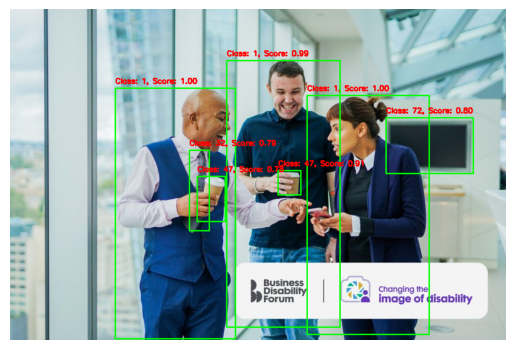

In [27]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Faster R-CNN model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1"
model = hub.load(model_url)

# Load an image
image_path = "/Users/omarm2/test3.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

# Perform inference
detections = model(input_tensor)

# Parse the detection results
boxes = detections["detection_boxes"].numpy()[0]
scores = detections["detection_scores"].numpy()[0]
classes = detections["detection_classes"].numpy()[0]

# Visualize the results
def plot_detections(image, boxes, scores, classes, score_threshold=0.5):
    height, width, _ = image.shape
    for i in range(len(scores)):
        if scores[i] > score_threshold:
            box = boxes[i]
            ymin, xmin, ymax, xmax = box
            xmin = int(xmin * width)
            xmax = int(xmax * width)
            ymin = int(ymin * height)
            ymax = int(ymax * height)

            # Draw bounding box
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

            # Add label and confidence score
            label = f"Class: {int(classes[i])}, Score: {scores[i]:.2f}"
            cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Plot detections
plot_detections(image, boxes, scores, classes, score_threshold=0.5)

### Detect Objects in a Video


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2

# Load the Faster R-CNN model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1"
model = hub.load(model_url)

# Open a video file or webcam
video_path = "/Users/omarm2/Downloads/archive-video-files/test.mp4"  # Replace with your video path or use 0 for webcam
cap = cv2.VideoCapture(video_path)

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(frame_rgb)
    input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

    # Perform inference
    detections = model(input_tensor)

    # Parse the detection results
    boxes = detections["detection_boxes"].numpy()[0]
    scores = detections["detection_scores"].numpy()[0]
    classes = detections["detection_classes"].numpy()[0]

    # Visualize the results
    for i in range(len(scores)):
        if scores[i] > 0.5:  # Only show detections with confidence > 50%
            box = boxes[i]
            ymin, xmin, ymax, xmax = box
            xmin = int(xmin * frame.shape[1])
            xmax = int(xmax * frame.shape[1])
            ymin = int(ymin * frame.shape[0])
            ymax = int(ymax * frame.shape[0])

            # Draw bounding box
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

            # Add label and confidence score
            label = f"Class: {int(classes[i])}, Score: {scores[i]:.2f}"
            cv2.putText(frame, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the frame
    cv2.imshow("Faster R-CNN Object Detection", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

### Explanation of the Code
## Model Loading:

The Faster R-CNN model is loaded from TensorFlow Hub using hub.load.

No need to download or set up the TensorFlow Object Detection API.

## Image/Video Preprocessing:

The image or video frame is converted to RGB format and then to a TensorFlow tensor.

A batch dimension is added to the tensor.

## Inference:

The model performs object detection on the input tensor.

The output includes bounding boxes, confidence scores, and class IDs.

## Visualization:

Bounding boxes, class labels, and confidence scores are drawn on the image or video frame using OpenCV.

The results are displayed in real-time (for video) or saved (for images).

In [1]:
pip install ultralytics opencv-python


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from ultralytics import YOLO
import cv2

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # You can use yolov8s.pt, yolov8m.pt, etc.

# Open the webcam
cap = cv2.VideoCapture(0)  # 0 is the default camera (usually the laptop's webcam)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Process the webcam feed frame by frame
while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Perform object detection on the frame
    results = model(frame)

    # Visualize the results
    annotated_frame = results[0].plot()  # Draw bounding boxes and labels on the frame

    # Display the annotated frame
    cv2.imshow("YOLO Object Detection", annotated_frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 68.8ms
Speed: 3.9ms preprocess, 68.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tv, 1 book, 67.8ms
Speed: 1.9ms preprocess, 67.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tv, 1 book, 101.6ms
Speed: 1.7ms preprocess, 101.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tv, 1 book, 59.0ms
Speed: 1.4ms preprocess, 59.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tv, 1 book, 59.4ms
Speed: 1.3ms preprocess, 59.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tv, 1 book, 55.2ms
Speed: 1.3ms preprocess, 55.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tv, 1 book, 61.3ms
Speed: 1.6ms preprocess, 61.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 t

How It Works
### Webcam Initialization:
cv2.VideoCapture(0) opens the default webcam.
If you have multiple cameras, you can use 1, 2, etc., to access them.
### Object Detection:
The YOLO model processes each frame from the webcam.
The results[0].plot() function draws bounding boxes, labels, and confidence scores on the frame.
### Display:
The annotated frame is displayed in a window using OpenCV.
### Exit:
Press q to stop the program and close the webcam feed.